# CSE-221710310015-ETTOM.SRINIJA

[Assignment Document Link](https://docs.google.com/document/d/1fCeFUbfmde73fTEWUlG3ZbWQpshEFXlr68WH_dTEDe8/edit?usp=sharing)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("master.csv")
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [3]:
# Check the data types and get the summary stats
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [4]:
data.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [5]:
data.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [6]:
data['HDI for year'].mean()

0.7766011477761785

In [7]:
# Create a dataframe by imputing  the missing values with mean 
df1= data['HDI for year'].fillna(data['HDI for year'].mean())
df1

0        0.776601
1        0.776601
2        0.776601
3        0.776601
4        0.776601
           ...   
27815    0.675000
27816    0.675000
27817    0.675000
27818    0.675000
27819    0.675000
Name: HDI for year, Length: 27820, dtype: float64

In [8]:
df1.isnull().sum()

0

In [9]:
data['HDI for year'].median()

0.779

In [10]:
# Create a dataframe by imputing  the missing values with median
df2= data['HDI for year'].fillna(data['HDI for year'].median())
df2

0        0.779
1        0.779
2        0.779
3        0.779
4        0.779
         ...  
27815    0.675
27816    0.675
27817    0.675
27818    0.675
27819    0.675
Name: HDI for year, Length: 27820, dtype: float64

In [11]:
df2.isnull().sum()

0

In [45]:
# If any missing values in categorical columns, impute it with mode
# NO missing calegorical columns to impute
data["generation"].value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [13]:
# For the categorical columns apply  different kinds of encoding techniques
# using dummies
dummy_set1=pd.get_dummies(data.generation,drop_first=True)
dummy_set1


,G.I. Generation,Generation X,Generation Z,Millenials,Silent
0,0,1,0,0,0
1,0,0,0,0,1
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
27815,0,1,0,0,0
27816,0,0,0,0,1
27817,0,0,1,0,0
27818,0,0,1,0,0


In [14]:
data=pd.concat([data,dummy_set1],axis=1)
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,G.I. Generation,Generation X,Generation Z,Millenials,Silent
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,0,1,0,0,0
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,0,0,0,0,1
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,0,1,0,0,0
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,1,0,0,0,0
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X,0,1,0,0,0
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent,0,0,0,0,1
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,0,0,1,0,0
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,0,0,1,0,0


In [19]:
# For the categorical columns apply  different kinds of encoding techniques
# using label encoder 
from sklearn.preprocessing import LabelEncoder
data['sex']=LabelEncoder().fit_transform(data.sex)
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,G.I. Generation,Generation X,Generation Z,Millenials,Silent
0,Albania,1987,1,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,0,1,0,0,0
1,Albania,1987,1,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,0,0,0,0,1
2,Albania,1987,0,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,0,1,0,0,0
3,Albania,1987,1,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,1,0,0,0,0
4,Albania,1987,1,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,0,0,0,0,0


In [20]:
# If there any duplicate values, drop the duplicate values
df=data.copy()
df.drop_duplicates()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,G.I. Generation,Generation X,Generation Z,Millenials,Silent
0,Albania,1987,1,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,0,1,0,0,0
1,Albania,1987,1,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,0,0,0,0,1
2,Albania,1987,0,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,0,1,0,0,0
3,Albania,1987,1,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,1,0,0,0,0
4,Albania,1987,1,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,0,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X,0,1,0,0,0
27816,Uzbekistan,2014,0,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent,0,0,0,0,1
27817,Uzbekistan,2014,1,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,0,0,1,0,0
27818,Uzbekistan,2014,0,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,0,0,1,0,0


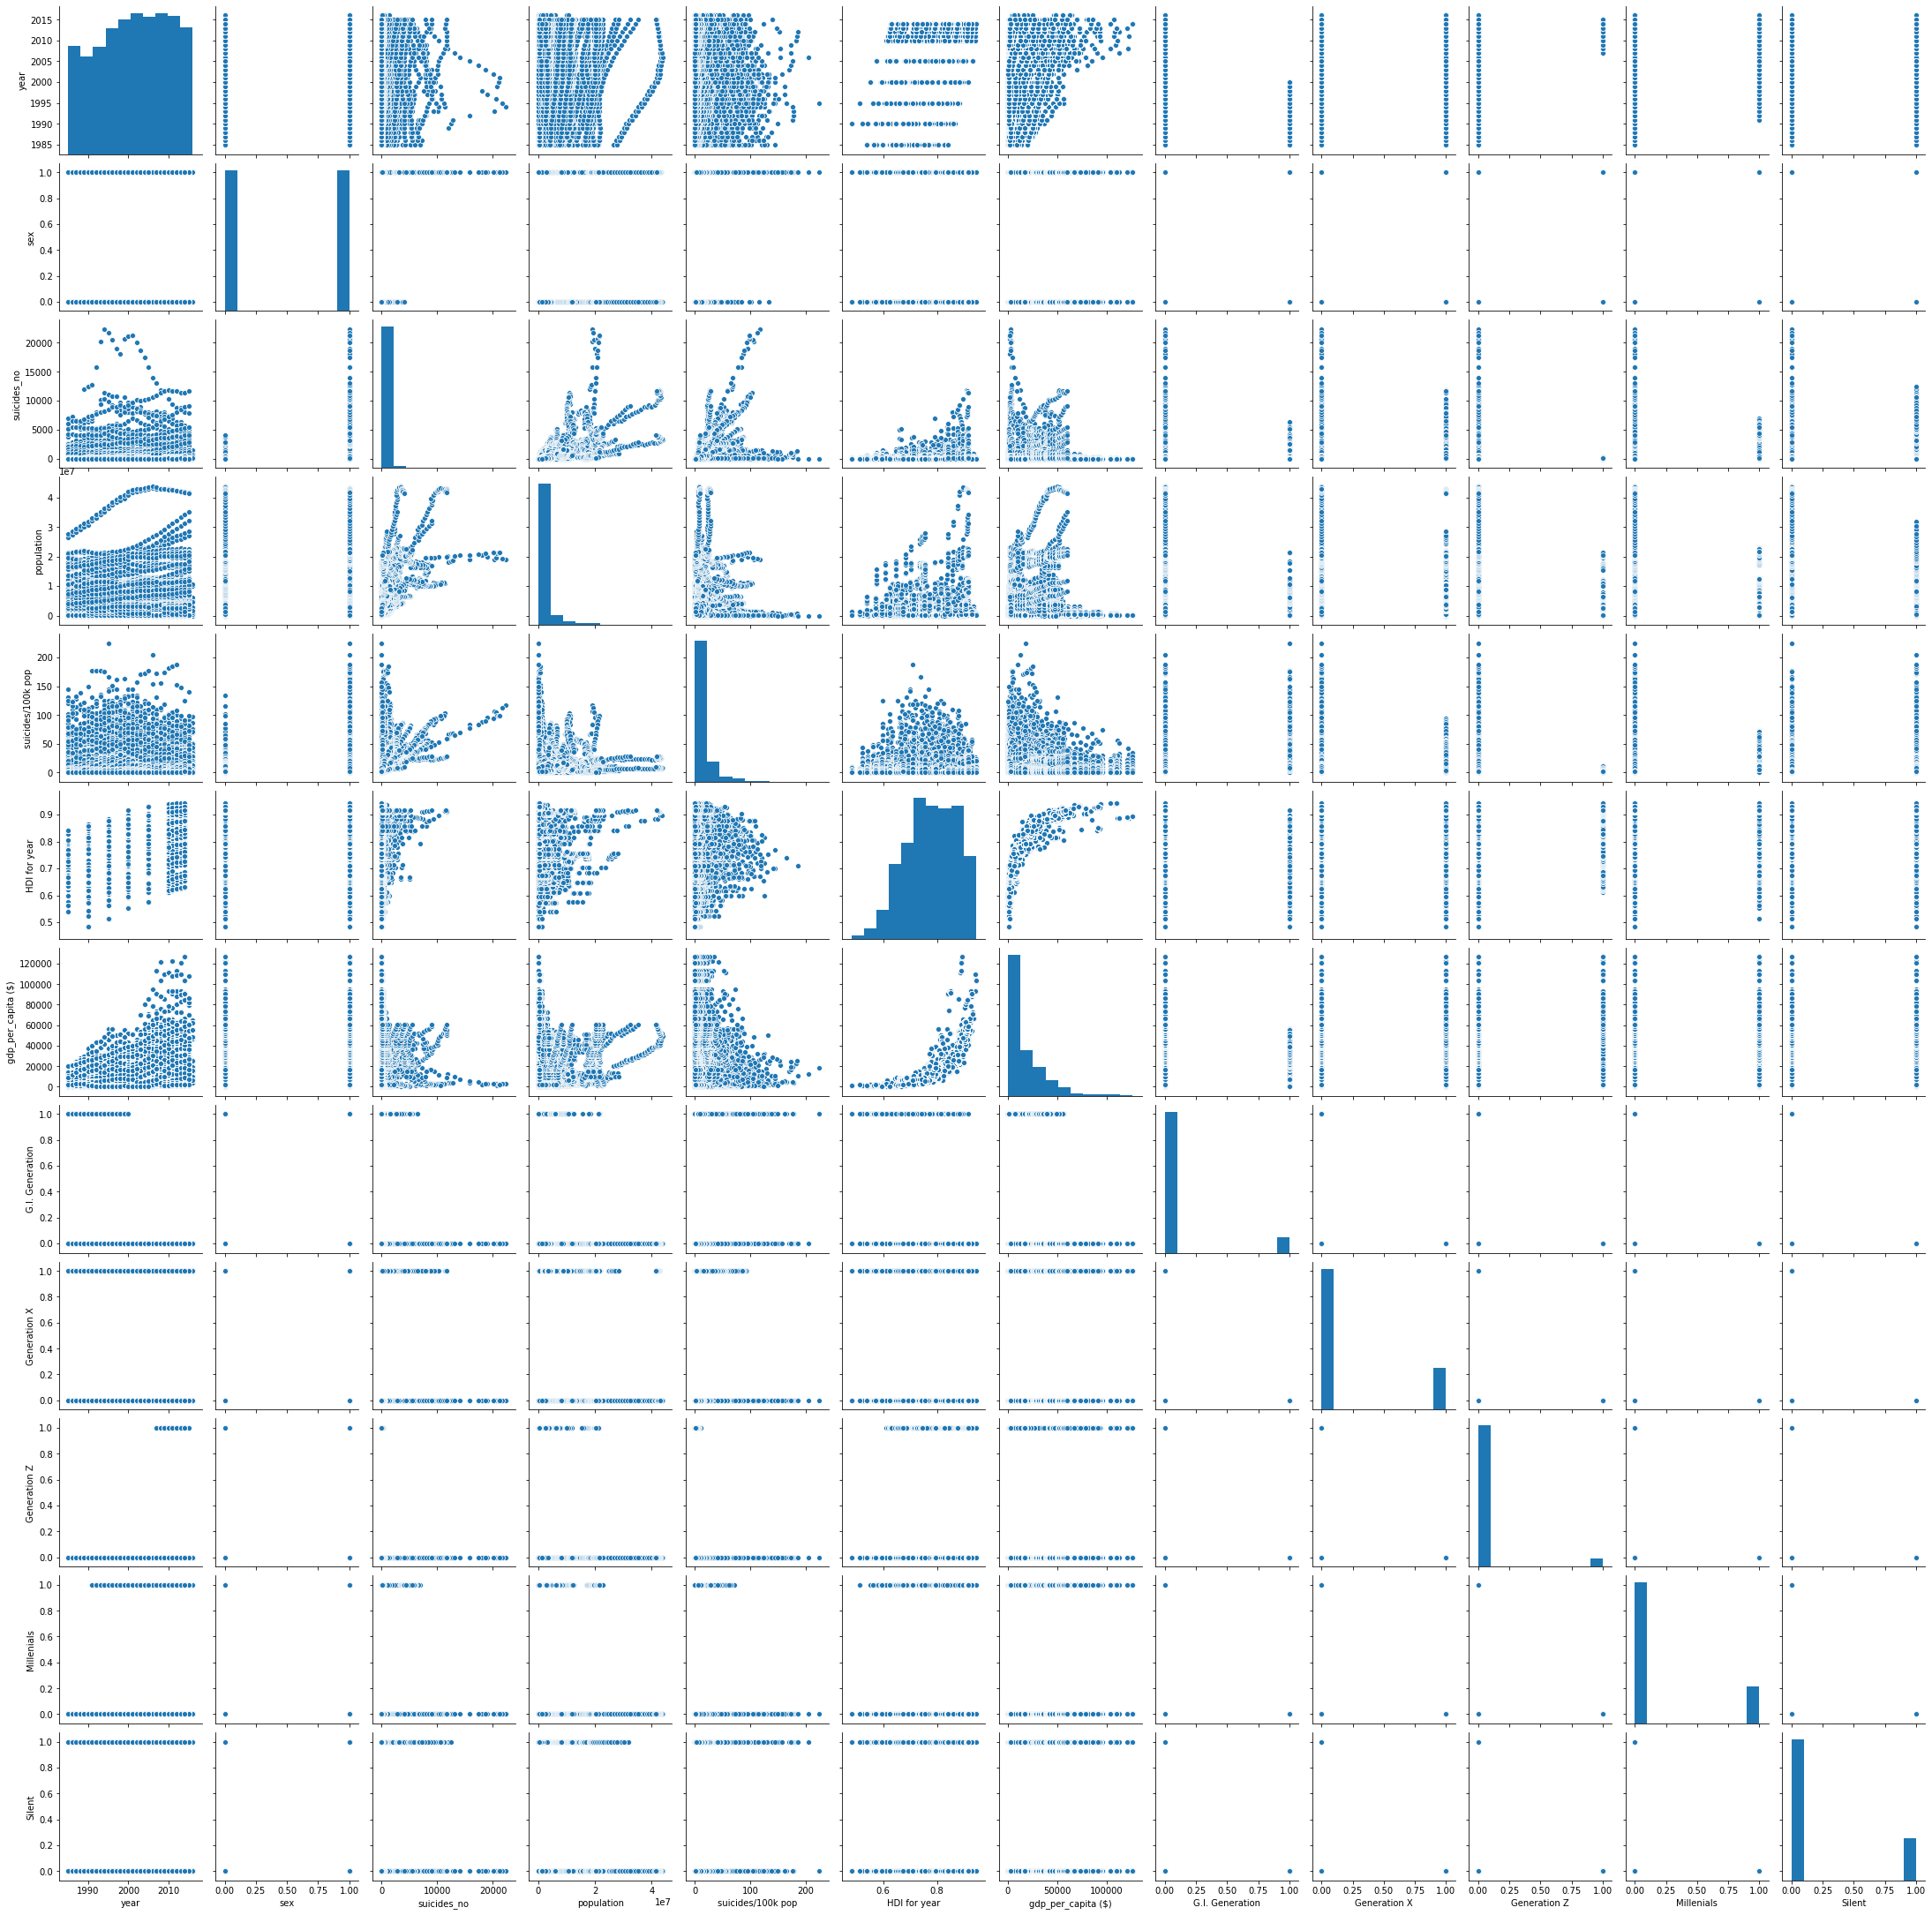

In [21]:
sns.pairplot(data)

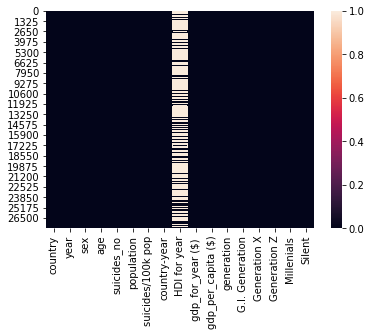

In [22]:
sns.heatmap(data.isna())

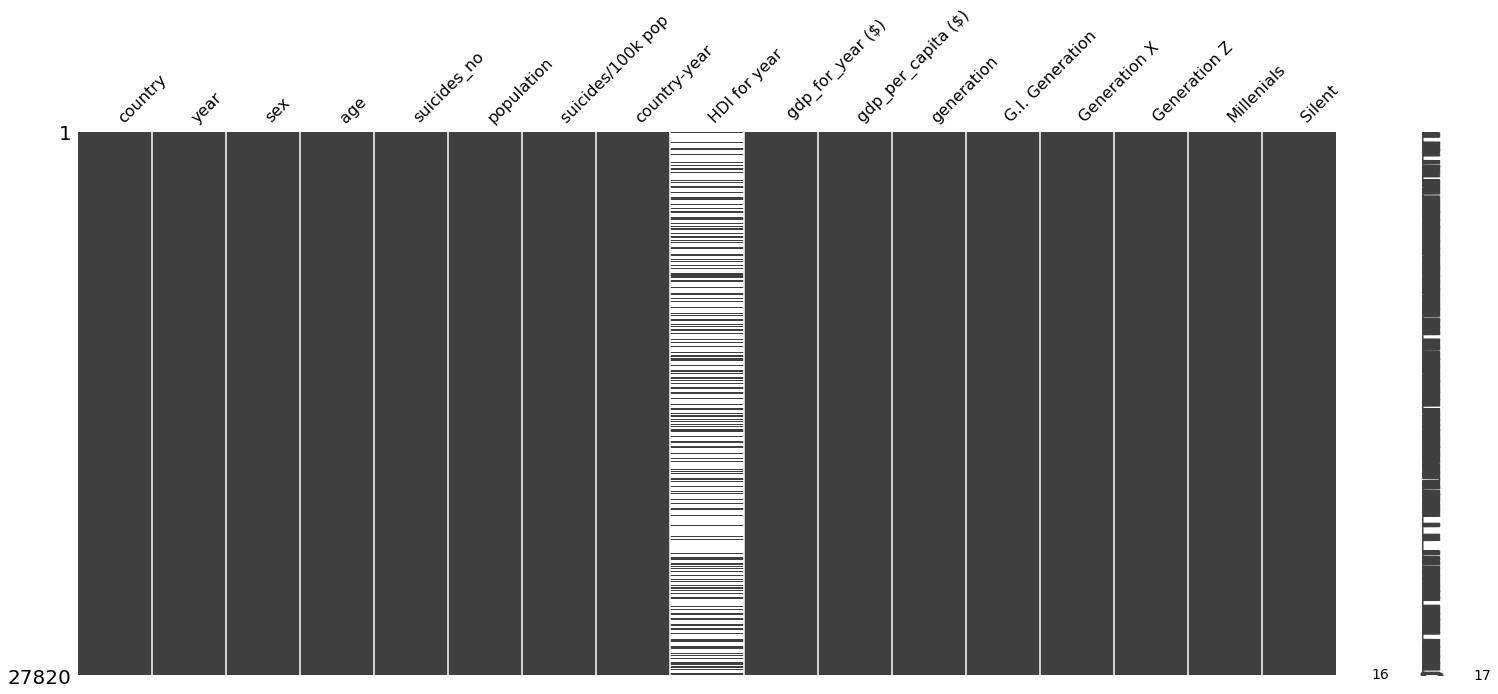

In [23]:
import missingno as msno
msno.matrix(data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000178AA24E608>,
      dtype=object)

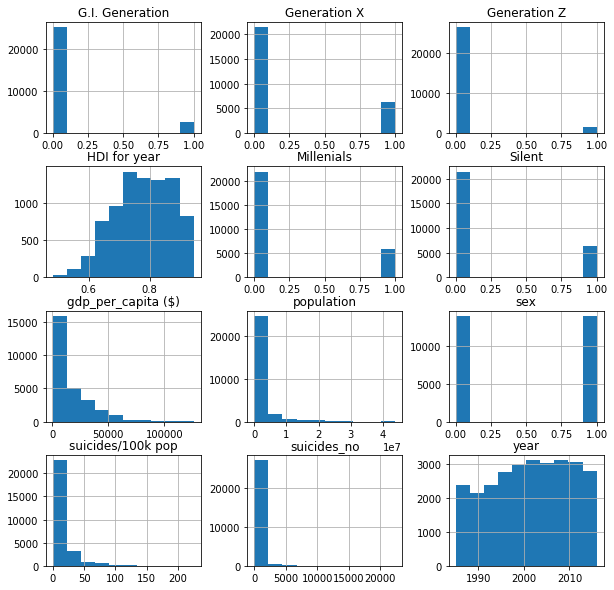

In [26]:
data.hist(figsize=(10,10))

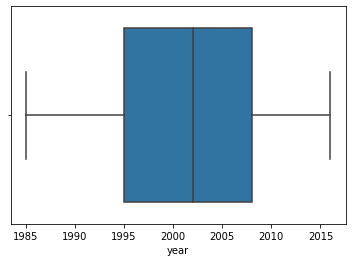

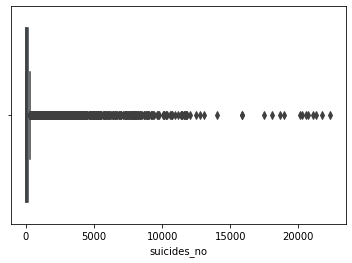

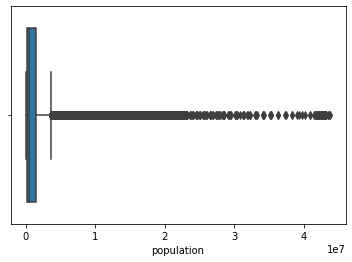

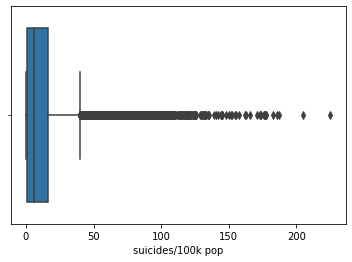

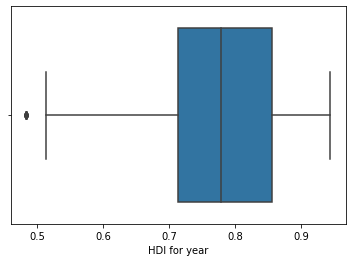

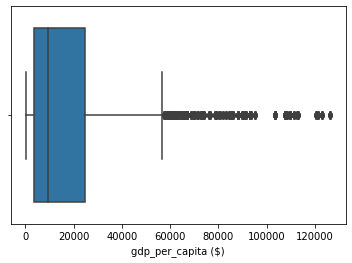

In [27]:
# Using boxplot, visualize the outliers if present in the dataset
for i in data.select_dtypes(include=['int64','float64']).columns:
    sns.boxplot(data[i])
    plt.show()

In [29]:
# Identify the Output column in the dataset and divide the entire dataset into Input and Output; create the training and testing datasets.
X = df.drop('generation',axis=1)
X.shape


(27820, 16)

In [30]:
y=df.iloc[:,0]
y.shape

(27820,)

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19474, 16)
(8346, 16)
(19474,)
(8346,)


In [37]:
X_train

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),G.I. Generation,Generation X,Generation Z,Millenials,Silent
5473,Chile,2002,0,35-54 years,101,2055488,4.91,Chile2002,NaN,"69,736,811,435",4866,0,0,0,0,0
3737,Belgium,2009,0,15-24 years,34,646252,5.26,Belgium2009,NaN,"484,552,792,442",47630,0,0,0,1,0
17600,New Zealand,1997,0,75+ years,5,115700,4.32,New Zealand1997,NaN,"66,074,513,018",19041,1,0,0,0,0
25259,Thailand,2012,0,55-74 years,222,5145957,4.31,Thailand2012,0.724,"397,558,094,270",6584,0,0,0,0,0
27529,Uruguay,2013,0,15-24 years,15,255905,5.86,Uruguay2013,0.790,"57,531,233,351",18179,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,Guatemala,2006,1,5-14 years,4,1830167,0.22,Guatemala2006,NaN,"30,231,249,362",2653,0,0,0,1,0
17289,Netherlands,2003,1,15-24 years,68,985449,6.90,Netherlands2003,NaN,"571,863,431,151",37614,0,0,0,1,0
5192,Canada,2008,1,35-54 years,1241,5076969,24.44,Canada2008,NaN,"1,549,131,208,997",49041,0,0,0,0,0
12172,Ireland,1994,0,25-34 years,9,256100,3.51,Ireland1994,NaN,"57,166,037,102",17188,0,0,0,0,0


In [38]:
X_test

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),G.I. Generation,Generation X,Generation Z,Millenials,Silent
1599,Australia,1999,0,25-34 years,117,1443911,8.10,Australia1999,NaN,"388,395,162,301",22016,0,1,0,0,0
25048,Thailand,1992,1,5-14 years,11,5819120,0.19,Thailand1992,NaN,"111,452,869,378",2120,0,0,0,1,0
26902,United States,1989,0,55-74 years,1432,21480000,6.67,United States1989,NaN,"5,657,693,000,000",24654,1,0,0,0,0
10722,Guatemala,1987,0,25-34 years,16,567102,2.82,Guatemala1987,NaN,"7,084,399,840",997,0,0,0,0,0
9680,Georgia,2013,0,55-74 years,8,471700,1.70,Georgia2013,0.750,"16,140,047,012",3850,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16752,Mexico,2000,0,75+ years,12,1128113,1.06,Mexico2000,0.699,"707,906,744,575",7892,1,0,0,0,0
6515,Croatia,2007,0,75+ years,45,204595,21.99,Croatia2007,NaN,"60,093,222,709",14204,0,0,0,0,1
26266,Ukraine,2003,0,55-74 years,738,5689228,12.97,Ukraine2003,NaN,"50,132,953,288",1097,0,0,0,0,1
11782,Iceland,1994,0,75+ years,2,7300,27.40,Iceland1994,NaN,"6,294,803,497",25937,1,0,0,0,0


In [39]:
y_train

5473           Chile
3737         Belgium
17600    New Zealand
25259       Thailand
27529        Uruguay
            ...     
10955      Guatemala
17289    Netherlands
5192          Canada
12172        Ireland
235          Albania
Name: country, Length: 19474, dtype: object

In [40]:
y_test

1599         Australia
25048         Thailand
26902    United States
10722        Guatemala
9680           Georgia
             ...      
16752           Mexico
6515           Croatia
26266          Ukraine
11782          Iceland
6279        Costa Rica
Name: country, Length: 8346, dtype: object